### Feature Engineering Handling Missing Value using Mean_Median_Mode

Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys
Feature Engineering---Handling Missing Values
Why are their Missing values?? Survey--Depression Survey

1.They hesitate to put down the information
2.Survey informations are not that valid
3.Men--salary
4.Women---age
5.People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

### All Techniques to Handle missing data

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


### What sre different type of missing data?
#### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if
the probability of being missing is the same for all the observations. When data is MCAR, there
is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
In other words, those missing data points are a random subset of the data. There is nothing systematic going on that
makes some data more likely to be missing than other.


In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv('Titanic_train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Embarked is the example of MCAR

In [7]:
# Returns only true false
dataset['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [8]:
# returns the observation(row) with true output
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing data not at random(MNAR)
Systematic missing Values There is absolutely some relationship between the data missing and any other values(Feature) ,observed
or missing, within the dataset.


In [9]:
dataset.Cabin.isnull().mean()

0.7710437710437711

In [16]:
# checking the relationship between Survived and cabin
import numpy as np

# nan values will have 1 else 0 in new feature Cabin_null
dataset['Cabin_null']=np.where(dataset['Cabin'].isnull(),1,0)


In [24]:
dataset['Cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: Cabin_null, dtype: int32

In [17]:
dataset['Cabin_null'].isnull().sum()

0

In [18]:
dataset.Cabin_null.mean()

0.7710437710437711

In [19]:
dataset.groupby('Cabin_null')['Survived'].mean()

Cabin_null
0    0.666667
1    0.299854
Name: Survived, dtype: float64

In [21]:
dataset.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

##### Survival Depends upon cabin

### Missing At Random(MAR)

1. Men---hide their salary
2. Women---hide their age


### Mean/Median/Mode Imputation


Q)When should we apply?

ANS:
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables



In [26]:
data=pd.read_csv('Titanic_train.csv',usecols=['Age','Fare','Survived'])
data.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
## Lets go and see the percentage of missing values
data.isnull().mean()


Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### Imputaion Using Median

In [28]:
# Imputing the nan value

def impute_nan(dataset,feature,median):
    dataset[feature+'_median']=dataset[feature].fillna(median)

In [29]:
impute_nan(data,'Age',data['Age'].median())

In [30]:
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [32]:
data['Age'].median()

28.0

In [33]:
data['Age_median'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_median, dtype: float64

In [34]:
# comparing the standard deviation after imputation
print(data['Age'].std())
print(data['Age_median'].std())

14.526497332334044
13.019696550973194


###### We saw that there is small deviation in values after the imputaion

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


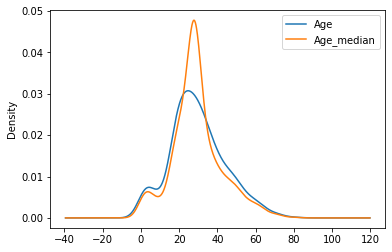

In [37]:
#The add_subplot() method figure module of matplotlib library is used to add an Axes to the figure as part of a subplot
#arrangement.


fig=plt.figure()
axis=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=axis)
data['Age_median'].plot(kind='kde',ax=axis)
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')

##### From the figure it is clearlly visibal that there is distortion in data after imputing using median

### Imputaion Using Mean

In [39]:
data['Age'].mean()

29.69911764705882

In [40]:
def mean_impute(dataset,feature,mean):
    dataset[feature+'_mean']=dataset[feature].fillna(mean)


In [41]:
mean_impute(data,'Age',data['Age'].mean())

In [43]:
print(data['Age'].std())
print(data['Age_mean'].std())


14.526497332334044
13.002015226002884


##### There is small deviation in the values of age

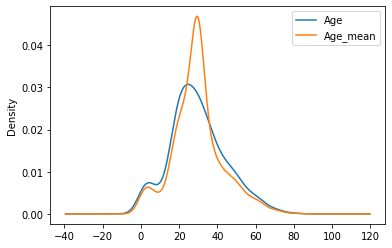

In [45]:
fig=plt.figure()
axis=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=axis)
data['Age_mean'].plot(kind='kde',ax=axis)
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')

##### Almost similar deviation is there after using mean and median imputaion